In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
#raw_data = pd.read_csv('F:\\Muthu_2023\\Personal\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\train_FD001.csv')
raw_data = pd.read_csv('E:\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\train_FD001.csv')
df = raw_data.drop(['Sensor3', 'Sensor4', 'Sensor8','Sensor9', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22'], axis=1)
df = df.merge(df[['Engine', 'Cycles']].groupby('Engine').max(), on = 'Engine', how='left')

df = df.rename(columns={"Cycles_x": "Cycles", "Cycles_y": "max_cycles"})

df['Cycle_cat'] = 0
df.loc[(df['max_cycles'] >190) & (df['max_cycles']<245), 'Cycle_cat'] = 1
df.loc[(df['max_cycles'] >=245), 'Cycle_cat'] = 2

In [4]:
df

,Engine,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,...,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,Remaining Cycles,max_cycles,Cycle_cat
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,1
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,1
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,1
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,1


# Principal Component Analysis (PCA)

In [ ]:
# pl = Pipeline([
# ("Scaling", StandardScaler()),
# ("PCA", PCA(10))])    

In [5]:
def PCA_Custom(local_df):
    ss = StandardScaler()
    ss.fit(local_df)
    scaled_df = ss.transform(local_df)
    
    pca = PCA(n_components = 0.95)
    pca.fit(scaled_df)
    pca_df = pca.transform(scaled_df)
    return pca, pca_df

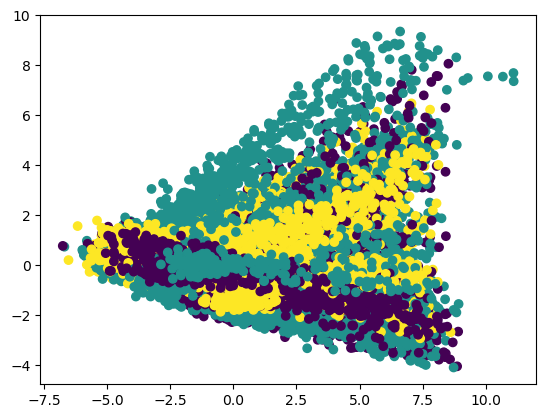

In [14]:
# Without Cycles Column
pca, pcadf = PCA_Custom(df.iloc[:, 2:-3])
pca_df = pd.DataFrame(pcadf)

plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c = df['Cycle_cat'])

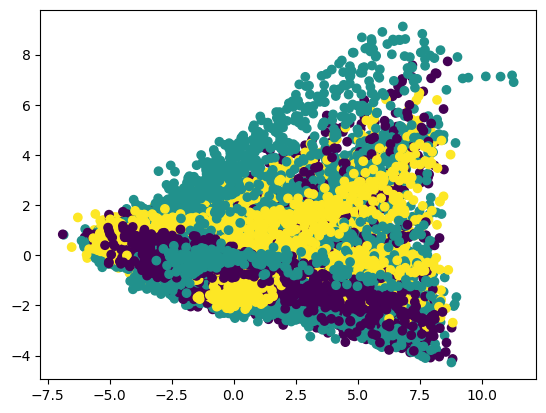

In [15]:
# With Engine and Cycles Column
pca, pcadf = PCA_Custom(df.iloc[:, :-3])
pca_df = pd.DataFrame(pcadf)
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c = df['Cycle_cat'])

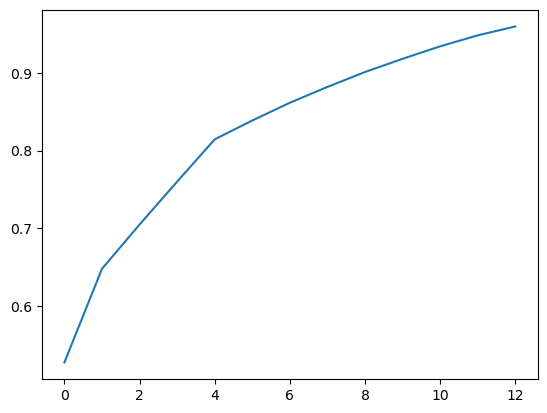

In [16]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [ ]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.iloc[:, :-3].columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [ ]:
most_important_names

In [ ]:
initial_feature_names

In [ ]:
most_important

In [ ]:
pca.components_[0].argmax()

# Engine wise analysis

In [ ]:
pca_df = pd.DataFrame(pcadf)

In [ ]:
plt.scatter(np.arange(len(pca_df)), pca_df.iloc[:,0])

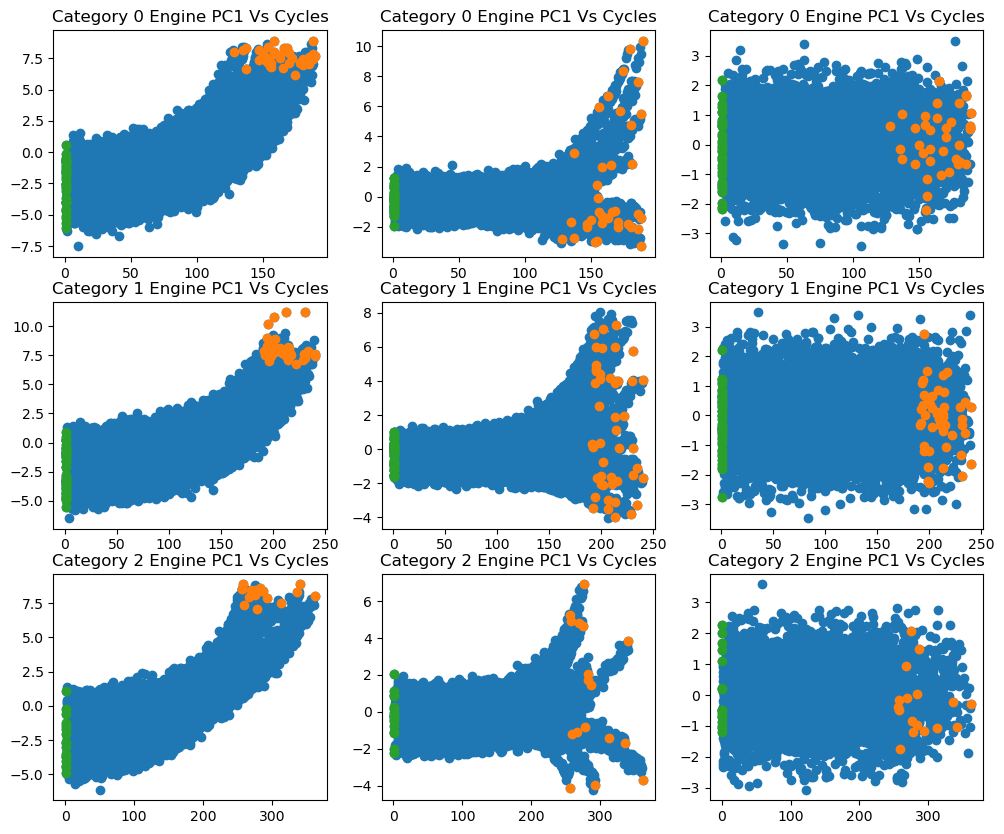

In [17]:
fig, ax = plt.subplots(3,3, figsize=(12,10))
for i in range(3):
    df_local = df[df['Cycle_cat'] == i]
    df_local.reset_index(inplace=True)
    max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
    min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

    pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
    pca_df = pd.DataFrame(pcadf)
    pca_df['Cycles'] = df_local['Cycles']
    max_df = pca_df.loc[max_pt]
    min_df = pca_df.loc[min_pt]

    ax[i, 0].scatter(pca_df['Cycles'], pca_df.iloc[:,0])
    ax[i, 0].scatter(max_df['Cycles'], max_df.iloc[:,0])
    ax[i, 0].scatter(min_df['Cycles'], min_df.iloc[:,0])
    ax[i, 0].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')
    
    ax[i, 1].scatter(pca_df['Cycles'], pca_df.iloc[:,1])
    ax[i, 1].scatter(max_df['Cycles'], max_df.iloc[:,1])
    ax[i, 1].scatter(min_df['Cycles'], min_df.iloc[:,1])
    ax[i, 1].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')

    ax[i, 2].scatter(pca_df['Cycles'], pca_df.iloc[:,2])
    ax[i, 2].scatter(max_df['Cycles'], max_df.iloc[:,2])
    ax[i, 2].scatter(min_df['Cycles'], min_df.iloc[:,2])
    ax[i, 2].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')

In [18]:
# df.drop(['level_0', 'index'], axis=1, inplace=True)
df

,Engine,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,...,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,Remaining Cycles,max_cycles,Cycle_cat
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,192,1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,192,1
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,192,1
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,192,1
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,200,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,200,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,200,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,200,1


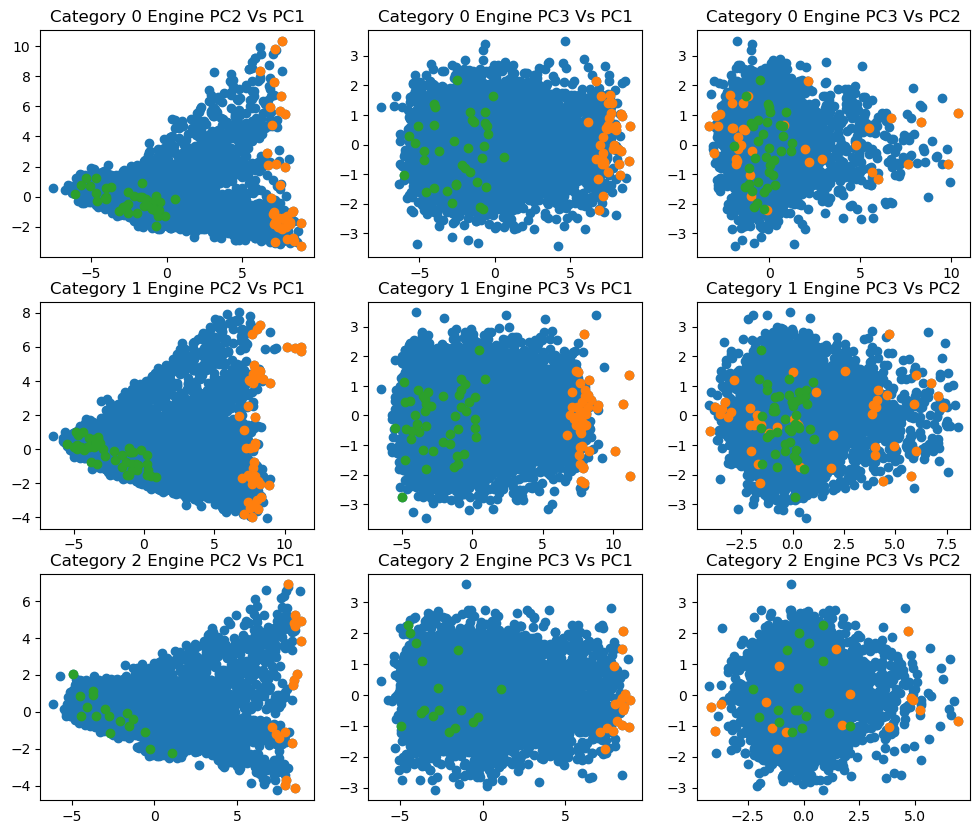

In [20]:
fig, ax = plt.subplots(3,3, figsize=(12,10))
for i in range(3):
    df_local = df[df['Cycle_cat'] == i]
    df_local.reset_index(inplace=True)
    max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
    min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

    pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
    pca_df = pd.DataFrame(pcadf)
    pca_df['Cycles'] = df_local['Cycles']
    max_df = pca_df.loc[max_pt]
    min_df = pca_df.loc[min_pt]

#     ax[i, 0].scatter(pca_df['Cycles'], pca_df.iloc[:,0])
#     ax[i, 0].scatter(max_df['Cycles'], max_df.iloc[:,0])
#     ax[i, 0].scatter(min_df['Cycles'], min_df.iloc[:,0])

#     ax[i, 1].scatter(pca_df['Cycles'], pca_df.iloc[:,1])
#     ax[i, 1].scatter(max_df['Cycles'], max_df.iloc[:,1])
#     ax[i, 1].scatter(min_df['Cycles'], min_df.iloc[:,1])

#     ax[i, 2].scatter(pca_df['Cycles'], pca_df.iloc[:,2])
#     ax[i, 2].scatter(max_df['Cycles'], max_df.iloc[:,2])
#     ax[i, 2].scatter(min_df['Cycles'], min_df.iloc[:,2])

    
    ax[i, 0].scatter(pca_df.iloc[:,0], pca_df.iloc[:,1])
    ax[i, 0].scatter(max_df.iloc[:,0], max_df.iloc[:,1])
    ax[i, 0].scatter(min_df.iloc[:,0], min_df.iloc[:,1])
    ax[i, 0].set_title('Category ' + str(i) + ' Engine PC2 Vs PC1')
    
    ax[i, 1].scatter(pca_df.iloc[:,0], pca_df.iloc[:,2])
    ax[i, 1].scatter(max_df.iloc[:,0], max_df.iloc[:,2])
    ax[i, 1].scatter(min_df.iloc[:,0], min_df.iloc[:,2])
    ax[i, 1].set_title('Category ' + str(i) + ' Engine PC3 Vs PC1')
    
    ax[i, 2].scatter(pca_df.iloc[:,1], pca_df.iloc[:,2])
    ax[i, 2].scatter(max_df.iloc[:,1], max_df.iloc[:,2])
    ax[i, 2].scatter(min_df.iloc[:,1], min_df.iloc[:,2])
    ax[i, 2].set_title('Category ' + str(i) + ' Engine PC3 Vs PC2')
  

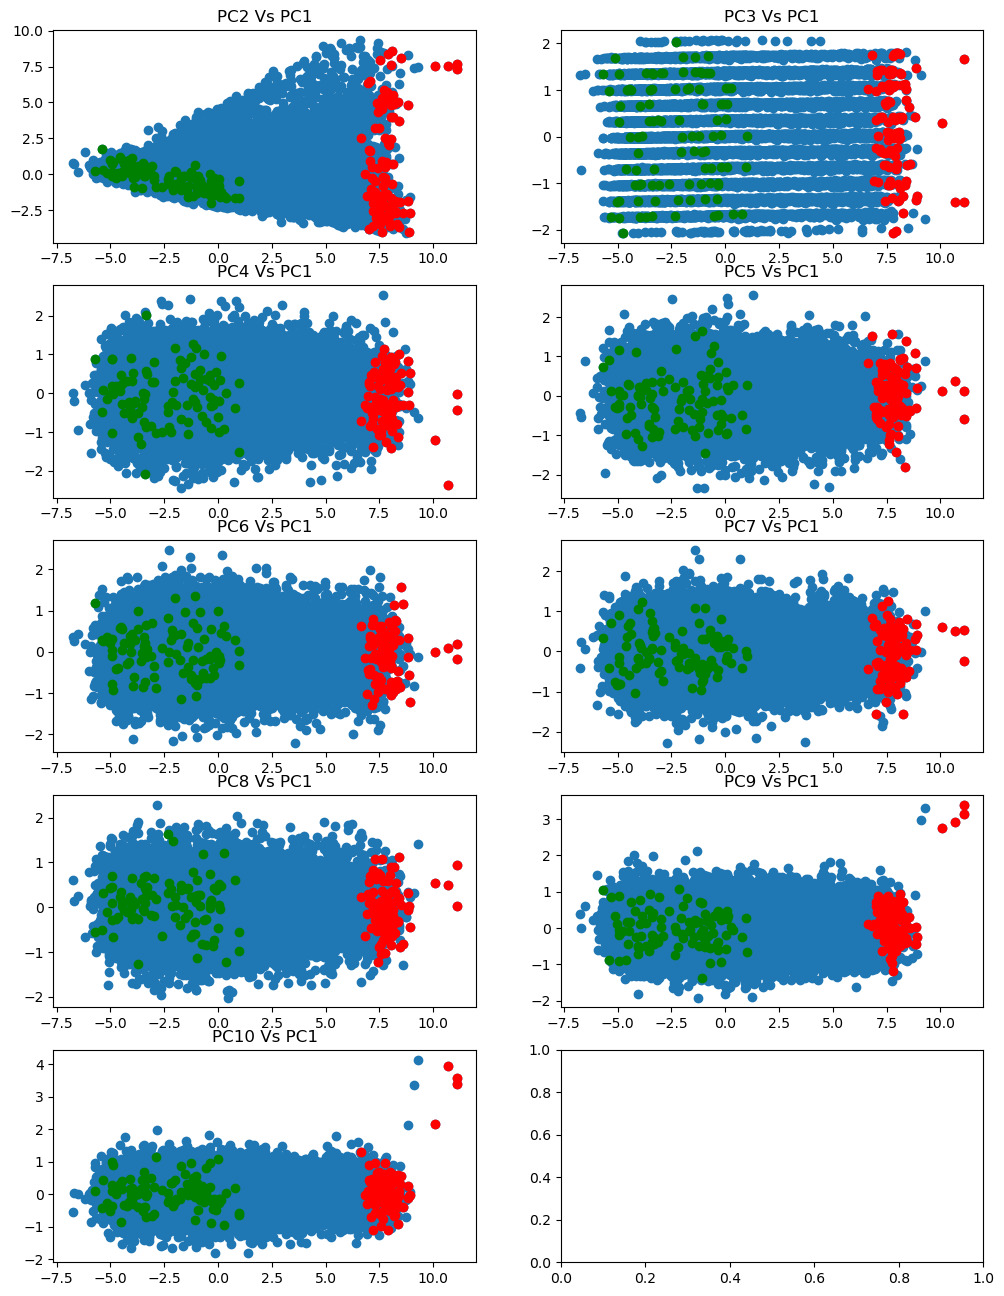

In [55]:
df_local = df
#df_local.reset_index(inplace=True)
max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
pca_df = pd.DataFrame(pcadf)
pca_df['Cycles'] = df_local['Cycles']
pca_df['Cycle_cat'] = df_local['Cycle_cat']
max_df = pca_df.loc[max_pt]
min_df = pca_df.loc[min_pt]
fig, ax = plt.subplots(5,2, figsize=(12,16))
for i in range(9):
    ax[i//2, i%2].scatter(pca_df.iloc[:,0], pca_df.iloc[:,i+1])
    ax[i//2, i%2].scatter(max_df.iloc[:,0], max_df.iloc[:,i+1], c='r')#max_df['Cycle_cat'])
    ax[i//2, i%2].scatter(min_df.iloc[:,0], min_df.iloc[:,i+1], c= 'g')#min_df['Cycle_cat'])
    ax[i//2, i%2].set_title('PC' + str(i+2) + ' Vs PC1')

In [52]:
exp_df

,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,Sensor14,...,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,max_cycles,Cycle_cat,Engine,Remaining Cycles
0,1.000000,-0.000700,-0.000400,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,...,2388.020000,8138.620000,8.419500,392.000000,39.060000,23.419000,192.0,1.0,1,191
1,1.523810,0.000662,-0.000348,641.992857,1590.810476,1401.930476,554.040476,2388.049524,9045.079524,47.480476,...,2388.046190,8134.885238,8.425943,392.000000,39.028571,23.421410,192.0,1.0,1,190
2,2.063444,-0.001152,-0.000111,642.123414,1589.779426,1402.760121,554.120725,2388.060665,9047.952991,47.403535,...,2388.040272,8134.280151,8.422966,391.268882,38.999849,23.393185,192.0,1.0,1,189
3,2.618832,-0.000621,-0.000079,642.188397,1587.774917,1402.504842,554.215158,2388.074814,9048.390924,47.325087,...,2388.051666,8134.151051,8.407260,391.478561,38.965477,23.387654,192.0,1.0,1,188
4,3.189874,-0.000928,-0.000108,642.231948,1586.593844,1403.395796,554.163560,2388.071261,9050.011858,47.314275,...,2388.048868,8134.066864,8.412569,391.843426,38.949775,23.391670,192.0,1.0,1,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,186.000002,-0.000070,0.000003,643.387004,1598.751570,1424.298324,551.752611,2388.210108,9066.789636,48.035357,...,2388.221990,8141.292113,8.504387,395.584703,38.482606,23.114125,200.0,1.0,100,4
20627,187.000001,-0.000209,-0.000043,643.400912,1599.274154,1425.142113,551.671465,2388.211916,9066.636942,48.035779,...,2388.221809,8140.856466,8.505252,395.531548,38.466005,23.118241,200.0,1.0,100,3
20628,188.000001,-0.000154,-0.000039,643.402648,1599.563777,1425.418285,551.604968,2388.214469,9066.569947,48.040708,...,2388.223463,8140.874060,8.510647,395.755953,38.463641,23.101428,200.0,1.0,100,2
20629,189.000001,-0.000240,-0.000008,643.386952,1600.081615,1425.519350,551.520880,2388.217699,9067.219952,48.072462,...,2388.224057,8140.730055,8.513216,395.687230,38.447856,23.098026,200.0,1.0,100,1


Inference: Only PC1 shows some relationship between the values and failure. 

# Feature Transformation

In [22]:
exp_df = df.drop(['Remaining Cycles'], axis=1).groupby('Engine').transform(lambda x: x.ewm(10).mean())
exp_df['Engine'] = df['Engine']
exp_df['Remaining Cycles'] = df['Remaining Cycles']
exp_df

,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,Sensor14,...,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,max_cycles,Cycle_cat,Engine,Remaining Cycles
0,1.000000,-0.000700,-0.000400,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,...,2388.020000,8138.620000,8.419500,392.000000,39.060000,23.419000,192.0,1.0,1,191
1,1.523810,0.000662,-0.000348,641.992857,1590.810476,1401.930476,554.040476,2388.049524,9045.079524,47.480476,...,2388.046190,8134.885238,8.425943,392.000000,39.028571,23.421410,192.0,1.0,1,190
2,2.063444,-0.001152,-0.000111,642.123414,1589.779426,1402.760121,554.120725,2388.060665,9047.952991,47.403535,...,2388.040272,8134.280151,8.422966,391.268882,38.999849,23.393185,192.0,1.0,1,189
3,2.618832,-0.000621,-0.000079,642.188397,1587.774917,1402.504842,554.215158,2388.074814,9048.390924,47.325087,...,2388.051666,8134.151051,8.407260,391.478561,38.965477,23.387654,192.0,1.0,1,188
4,3.189874,-0.000928,-0.000108,642.231948,1586.593844,1403.395796,554.163560,2388.071261,9050.011858,47.314275,...,2388.048868,8134.066864,8.412569,391.843426,38.949775,23.391670,192.0,1.0,1,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,186.000002,-0.000070,0.000003,643.387004,1598.751570,1424.298324,551.752611,2388.210108,9066.789636,48.035357,...,2388.221990,8141.292113,8.504387,395.584703,38.482606,23.114125,200.0,1.0,100,4
20627,187.000001,-0.000209,-0.000043,643.400912,1599.274154,1425.142113,551.671465,2388.211916,9066.636942,48.035779,...,2388.221809,8140.856466,8.505252,395.531548,38.466005,23.118241,200.0,1.0,100,3
20628,188.000001,-0.000154,-0.000039,643.402648,1599.563777,1425.418285,551.604968,2388.214469,9066.569947,48.040708,...,2388.223463,8140.874060,8.510647,395.755953,38.463641,23.101428,200.0,1.0,100,2
20629,189.000001,-0.000240,-0.000008,643.386952,1600.081615,1425.519350,551.520880,2388.217699,9067.219952,48.072462,...,2388.224057,8140.730055,8.513216,395.687230,38.447856,23.098026,200.0,1.0,100,1


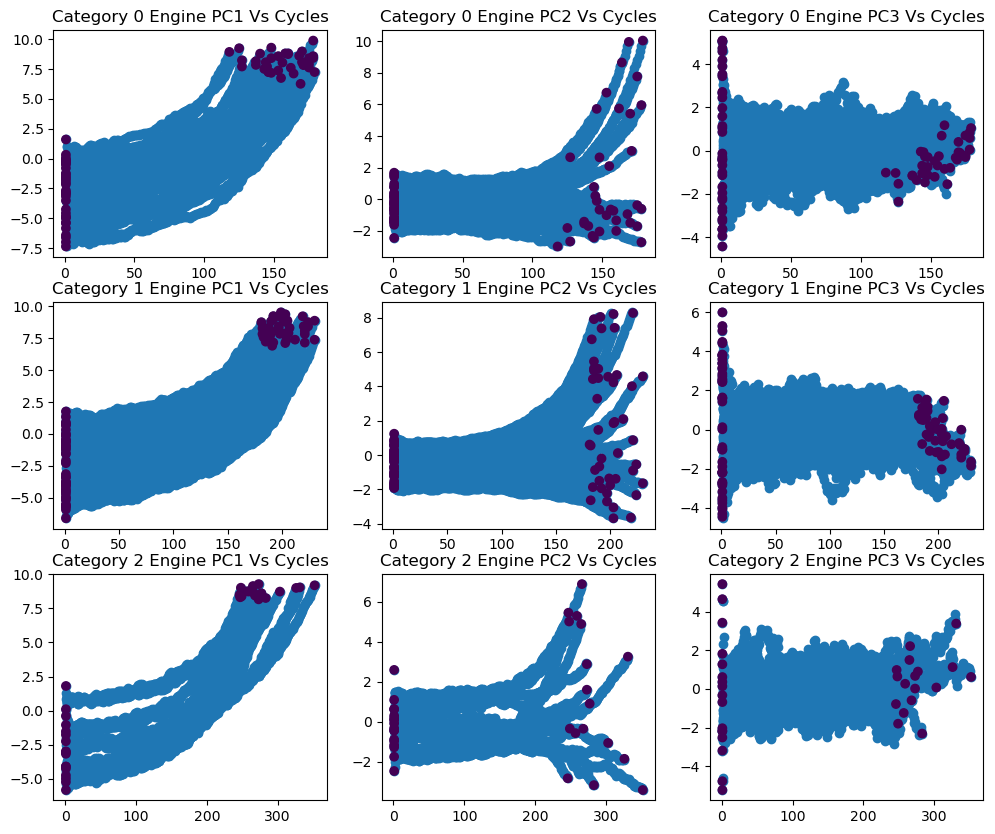

In [47]:
#Apply PCA on the transformed data (Exponential Mean)
fig, ax = plt.subplots(3,3, figsize=(12,10))
for i in range(3):
    df_local = exp_df[exp_df['Cycle_cat'] == i]
    df_local.reset_index(inplace=True)
    max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
    min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

    pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
    pca_df = pd.DataFrame(pcadf)
    pca_df['Cycles'] = df_local['Cycles']
    pca_df['Cycle_cat'] = df_local['Cycle_cat']
    max_df = pca_df.loc[max_pt]
    min_df = pca_df.loc[min_pt]

    ax[i, 0].scatter(pca_df['Cycles'], pca_df.iloc[:,0])
    ax[i, 0].scatter(max_df['Cycles'], max_df.iloc[:,0], c=max_df['Cycle_cat'])
    ax[i, 0].scatter(min_df['Cycles'], min_df.iloc[:,0], c=min_df['Cycle_cat'])
    ax[i, 0].set_title('Category ' + str(i) + ' Engine PC1 Vs Cycles')
    
    ax[i, 1].scatter(pca_df['Cycles'], pca_df.iloc[:,1])
    ax[i, 1].scatter(max_df['Cycles'], max_df.iloc[:,1], c=max_df['Cycle_cat'])
    ax[i, 1].scatter(min_df['Cycles'], min_df.iloc[:,1], c=min_df['Cycle_cat'])
    ax[i, 1].set_title('Category ' + str(i) + ' Engine PC2 Vs Cycles')

    ax[i, 2].scatter(pca_df['Cycles'], pca_df.iloc[:,2])
    ax[i, 2].scatter(max_df['Cycles'], max_df.iloc[:,2], c=max_df['Cycle_cat'])
    ax[i, 2].scatter(min_df['Cycles'], min_df.iloc[:,2], c=min_df['Cycle_cat'])
    ax[i, 2].set_title('Category ' + str(i) + ' Engine PC3 Vs Cycles')

In [41]:
del df_local

In [46]:
exp_df.drop(['level_0', 'index'], inplace=True, axis=1)

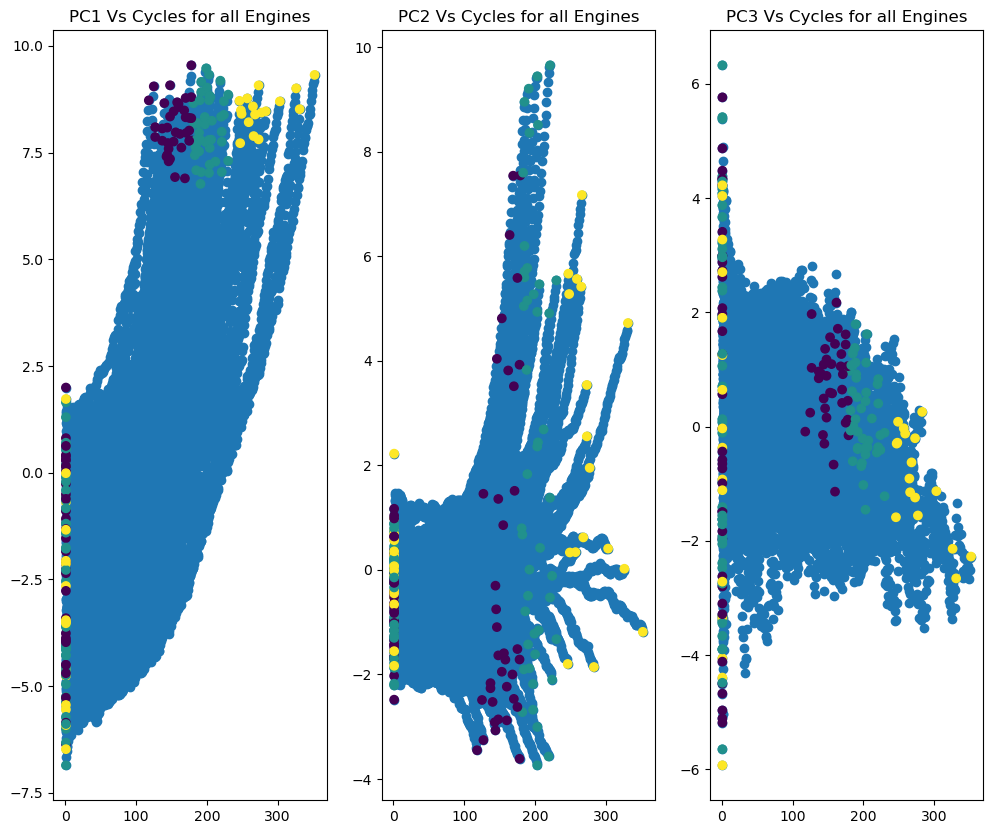

In [36]:
#All engines together without segragating based on category on the transformed sensor data (Exp mean)
#Apply PCA on the transformed data (Exponential Mean)
fig, ax = plt.subplots(1,3, figsize=(12,10))
for i in range(1):
    df_local = exp_df#[exp_df['Cycle_cat'] == i]
    #df_local.reset_index(inplace=True)
    max_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
    min_pt = list(df_local[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

    pca, pcadf = PCA_Custom(df_local.iloc[:, 3:-3])
    pca_df = pd.DataFrame(pcadf)
    pca_df['Cycles'] = df_local['Cycles']
    pca_df['Cycle_cat'] = df_local['Cycle_cat']
    
    max_df = pca_df.loc[max_pt]
    min_df = pca_df.loc[min_pt]

    ax[0].scatter(pca_df['Cycles'], pca_df.iloc[:,0])
    ax[0].scatter(max_df['Cycles'], max_df.iloc[:,0], c=max_df['Cycle_cat'])
    ax[0].scatter(min_df['Cycles'], min_df.iloc[:,0], c=min_df['Cycle_cat'])
    ax[0].set_title('PC1 Vs Cycles for all Engines')
    
    ax[1].scatter(pca_df['Cycles'], pca_df.iloc[:,1])
    ax[1].scatter(max_df['Cycles'], max_df.iloc[:,1], c=max_df['Cycle_cat'])
    ax[1].scatter(min_df['Cycles'], min_df.iloc[:,1], c=min_df['Cycle_cat'])
    ax[1].set_title('PC2 Vs Cycles for all Engines')

    ax[2].scatter(pca_df['Cycles'], pca_df.iloc[:,2])
    ax[2].scatter(max_df['Cycles'], max_df.iloc[:,2], c=max_df['Cycle_cat'])
    ax[2].scatter(min_df['Cycles'], min_df.iloc[:,2], c=min_df['Cycle_cat'])
    ax[2].set_title('PC3 Vs Cycles for all Engines')

In [32]:
exp_df

,level_0,index,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,...,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,max_cycles,Cycle_cat,Engine,Remaining Cycles
0,0,0,1.000000,-0.000700,-0.000400,641.820000,1589.700000,1400.600000,554.360000,2388.060000,...,2388.020000,8138.620000,8.419500,392.000000,39.060000,23.419000,192.0,1.0,1,191
1,1,1,1.523810,0.000662,-0.000348,641.992857,1590.810476,1401.930476,554.040476,2388.049524,...,2388.046190,8134.885238,8.425943,392.000000,39.028571,23.421410,192.0,1.0,1,190
2,2,2,2.063444,-0.001152,-0.000111,642.123414,1589.779426,1402.760121,554.120725,2388.060665,...,2388.040272,8134.280151,8.422966,391.268882,38.999849,23.393185,192.0,1.0,1,189
3,3,3,2.618832,-0.000621,-0.000079,642.188397,1587.774917,1402.504842,554.215158,2388.074814,...,2388.051666,8134.151051,8.407260,391.478561,38.965477,23.387654,192.0,1.0,1,188
4,4,4,3.189874,-0.000928,-0.000108,642.231948,1586.593844,1403.395796,554.163560,2388.071261,...,2388.048868,8134.066864,8.412569,391.843426,38.949775,23.391670,192.0,1.0,1,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,20626,20626,186.000002,-0.000070,0.000003,643.387004,1598.751570,1424.298324,551.752611,2388.210108,...,2388.221990,8141.292113,8.504387,395.584703,38.482606,23.114125,200.0,1.0,100,4
20627,20627,20627,187.000001,-0.000209,-0.000043,643.400912,1599.274154,1425.142113,551.671465,2388.211916,...,2388.221809,8140.856466,8.505252,395.531548,38.466005,23.118241,200.0,1.0,100,3
20628,20628,20628,188.000001,-0.000154,-0.000039,643.402648,1599.563777,1425.418285,551.604968,2388.214469,...,2388.223463,8140.874060,8.510647,395.755953,38.463641,23.101428,200.0,1.0,100,2
20629,20629,20629,189.000001,-0.000240,-0.000008,643.386952,1600.081615,1425.519350,551.520880,2388.217699,...,2388.224057,8140.730055,8.513216,395.687230,38.447856,23.098026,200.0,1.0,100,1


In [ ]:
# Differencing
#diff_df = df.iloc[:,3:-3]
col_list = df.iloc[:,3:-3].columns

#ax1.hist(diff_df, bins=20);
#ax2.hist(diff_df.loc[df[df['Remaining Cycles'] == 0].index], color='r', bins=20, alpha=0.5)
i = 0
for col in col_list:
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax2 = ax1.twinx()
    diff_df = df.groupby('Engine')[col].transform(lambda x: x.diff(1))
    ax1.hist(diff_df, bins=10);
    ax2.hist(diff_df.loc[df[df['Remaining Cycles'] == 0].index], color='r', bins = 10, alpha=0.5)
    ax1.set_title('Histogram of Diff: ' + col)
    i = i + 1

In [ ]:
# Differencing for ewm transformed data

col_list = exp_df.iloc[:,2:-4].columns
i = 0
for col in col_list:
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax2 = ax1.twinx()
    diff_df = exp_df.groupby('Engine')[col].transform(lambda x: x.diff(1))
    ax1.hist(diff_df, bins=20);
    ax2.hist(diff_df.loc[exp_df[exp_df['Remaining Cycles'] == 0].index], color='r', bins = 10, alpha=0.5)
    ax1.set_title('Histogram of Diff: ' + col)
    i = i + 1

Applied Exponential moving average for all sensor data for each engine
Differentiation is performed on all sensor data with its previous cycle
Inference:
Sparsity is eliminated in the data and it is confined
Most of the Failures are happening on the gradual change
Failures are happening on both raising and falling slope of sensor data
Sensor17 graph shows that during 50% of failures sensor 17 data is changing higher tha

In [ ]:
diff_df.loc[exp_df[exp_df['Remaining Cycles'] == 0].index]

Inference: 
y(n) = x(n) - x(n-1)  # First Difference performed for each engine separately
Engine fails 
Sensor2: Fails for each values
Sensor3: 

In [ ]:
col_list = df.iloc[:,3:-3].columns
len(col_list)

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.hist(diff_df, bins=20);
ax2.hist(diff_df.loc[df[df['Remaining Cycles'] == 0].index], color='r', bins=20, alpha=0.5)

# Feature Selection

In [72]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [96]:
col_list = df.columns
sens_col = [col for col in col_list if 'Sensor' in col]

In [97]:
exp_df = df.groupby('Engine').transform(lambda x: x.ewm(10).mean())
exp_df['Engine'] = df['Engine']
exp_df['Cycles'] = df['Cycles']
exp_df['Remaining Cycles'] = df['Remaining Cycles']
scaled_df = df.copy()
for i in sens_col:
    scaled_df[i] = (scaled_df[i] - scaled_df[i].mean()) / scaled_df[i].std()
scaled_df

,Engine,Cycles,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,...,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,Remaining Cycles,max_cycles,Cycle_cat
0,1,1,-0.315972,-1.372920,-1.721684,-0.134252,-0.925914,1.121113,-0.516326,-0.862792,...,0.334254,-1.058865,-0.269065,-0.603801,-0.781691,1.348460,1.194398,191,192,1
1,1,2,0.872701,-1.031695,-1.061754,0.211523,-0.643710,0.431920,-0.798074,-0.958794,...,1.174871,-0.363637,-0.642829,-0.275845,-0.781691,1.016503,1.236892,190,192,1
2,1,3,-1.961827,1.015652,-0.661797,-0.413156,-0.525940,1.008131,-0.234578,-0.557126,...,1.364688,-0.919819,-0.551616,-0.649128,-2.073044,0.739873,0.503411,189,192,1
3,1,4,0.324083,-0.008022,-0.661797,-1.261284,-0.784812,1.222798,0.188044,-0.713808,...,1.961255,-0.224592,-0.520163,-1.971617,-0.781691,0.352590,0.777773,188,192,1
4,1,5,-0.864590,-0.690471,-0.621801,-1.251498,-0.301511,0.714376,-0.516326,-0.457048,...,1.052846,-0.780774,-0.521736,-0.339837,-0.136014,0.463242,1.059526,187,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178817,-1.031695,1.617961,1.216229,2.188322,-2.189276,1.315035,0.012546,...,-2.607906,2.278227,-0.322534,1.425260,2.446692,-1.805129,-2.921042,4,200,1
20627,100,197,-0.727436,-1.714145,1.717950,2.279651,2.738285,-2.833277,1.878530,-0.006020,...,-2.350298,1.722045,-0.380198,1.913194,1.155339,-2.856326,-1.203735,3,200,1
20628,100,198,0.186928,-0.008022,1.477975,1.946924,2.138325,-2.742891,2.019404,0.029754,...,-1.902872,2.000136,-0.141680,3.265013,3.092369,-2.081760,-3.292402,2,200,1
20629,100,199,-0.498845,1.015652,1.098016,2.403608,1.955004,-3.036645,2.160278,0.383875,...,-2.363856,1.861090,-0.233942,2.579771,1.155339,-2.911652,-2.085021,1,200,1


In [99]:
pca = PCA(n_components = 0.95)
pca.fit(scaled_df)
pcadf = pca.transform(scaled_df)

In [100]:
x = scaled_df.iloc[:, 2:-3]
x['PC1'] = pcadf[:,0]
y = scaled_df['Remaining Cycles']
x

,Sensor1,Sensor2,Sensor5,Sensor6,Sensor7,Sensor10,Sensor11,Sensor12,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor20,Sensor23,Sensor24,PC1
0,-0.315972,-1.372920,-1.721684,-0.134252,-0.925914,1.121113,-0.516326,-0.862792,-0.266460,0.334254,-1.058865,-0.269065,-0.603801,-0.781691,1.348460,1.194398,-135.087432
1,0.872701,-1.031695,-1.061754,0.211523,-0.643710,0.431920,-0.798074,-0.958794,-0.191578,1.174871,-0.363637,-0.642829,-0.275845,-0.781691,1.016503,1.236892,-133.660299
2,-1.961827,1.015652,-0.661797,-0.413156,-0.525940,1.008131,-0.234578,-0.557126,-1.015279,1.364688,-0.919819,-0.551616,-0.649128,-2.073044,0.739873,0.503411,-132.261022
3,0.324083,-0.008022,-0.661797,-1.261284,-0.784812,1.222798,0.188044,-0.713808,-1.539452,1.961255,-0.224592,-0.520163,-1.971617,-0.781691,0.352590,0.777773,-130.858935
4,-0.864590,-0.690471,-0.621801,-1.251498,-0.301511,0.714376,-0.516326,-0.457048,-0.977838,1.052846,-0.780774,-0.521736,-0.339837,-0.136014,0.463242,1.059526,-129.419060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.178817,-1.031695,1.617961,1.216229,2.188322,-2.189276,1.315035,0.012546,1.979996,-2.607906,2.278227,-0.322534,1.425260,2.446692,-1.805129,-2.921042,135.185343
20627,-0.727436,-1.714145,1.717950,2.279651,2.738285,-2.833277,1.878530,-0.006020,1.867673,-2.350298,1.722045,-0.380198,1.913194,1.155339,-2.856326,-1.203735,136.602436
20628,0.186928,-0.008022,1.477975,1.946924,2.138325,-2.742891,2.019404,0.029754,2.054877,-1.902872,2.000136,-0.141680,3.265013,3.092369,-2.081760,-3.292402,138.041810
20629,-0.498845,1.015652,1.098016,2.403608,1.955004,-3.036645,2.160278,0.383875,3.178105,-2.363856,1.861090,-0.233942,2.579771,1.155339,-2.911652,-2.085021,139.449423


In [101]:
selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(x, y)
temp = {'Features': selector.feature_names_in_, 'Scores': selector.scores_, 'pvals':selector.pvalues_}
mutual_scores_df = pd.DataFrame(temp)
mutual_scores_df.sort_values(by='Scores', ascending=False)

,Features,Scores,pvals
16,PC1,1.394371,None
8,Sensor14,0.505886,None
4,Sensor7,0.466220,None
9,Sensor15,0.437538,None
5,Sensor10,0.423551,None
12,Sensor18,0.389067,None
15,Sensor24,0.379906,None
14,Sensor23,0.375629,None
2,Sensor5,0.337063,None
13,Sensor20,0.332401,None


In [102]:
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(x, y)
temp = {'Features': selector.feature_names_in_, 'Scores': selector.scores_, 'pvals':selector.pvalues_}
f_scores_df = pd.DataFrame(temp)
f_scores_df.sort_values(by='Scores', ascending=False)

,Features,Scores,pvals
16,PC1,135891.183009,0.000000
8,Sensor14,19406.598613,0.000000
4,Sensor7,17641.647140,0.000000
9,Sensor15,16985.048173,0.000000
5,Sensor10,15685.929943,0.000000
12,Sensor18,14515.353596,0.000000
15,Sensor24,13987.262919,0.000000
14,Sensor23,13535.168228,0.000000
2,Sensor5,12002.674101,0.000000
13,Sensor20,11982.004911,0.000000
